<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/10_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np

In [182]:
df = pd.read_csv('churn.csv', sep =',')
df.head() #mostra solo le prime 5 righe. se metto head(10) le prime 10

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____ Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1)

In [183]:
print(f'Numero righe: {df.shape[0]}') #il numero di istanze è il numero di righe -> 10000
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe: 10000
Numero colonne: 14


In [184]:
df.isnull().sum() #non ci sono missing values -> dataset completo

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [185]:
df['Exited'].value_counts() #il dataset non è bilanciato. il numero di clienti che sono rimasti  nella banca sono 7963 mentra quelli che rimangono sono 2037

,count
Exited,
0,7963
1,2037


Dopo aver discretizzato l’attributo Age in 5 gruppi, verificare se è vero che i clienti più anziani hanno meno probabilità di abbandonare la banca rispetto ai più giovani. (2 punti)

Considerando i clienti con più di 60 anni, verificare se è vero che maggiore è il saldo (Balance) e minore è la probabilità che il cliente abbandoni la banca. (2 punti)


In [186]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [187]:
df['Age_disc'] = pd.cut(df['Age'], bins=5)
df['Age_disc'].unique()

[(32.8, 47.6], (47.6, 62.4], (17.926, 32.8], (62.4, 77.2], (77.2, 92.0]]
Categories (5, interval[float64, right]): [(17.926, 32.8] < (32.8, 47.6] < (47.6, 62.4] <
                                           (62.4, 77.2] < (77.2, 92.0]]

In [188]:
df.groupby('Age_disc')['Exited'].mean()
#si può osservare che i clienti più anziani, dell'ultima fascia hanno meno probabilità di abbandonare la banca ma si tratta di percentuali basse
#la fascia più propensa ad abbandonare la banca è quella intermedia

/tmp/ipython-input-372538267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_disc')['Exited'].mean()


,Exited
Age_disc,
"(17.926, 32.8]",0.076344
"(32.8, 47.6]",0.188182
"(47.6, 62.4]",0.529978
"(62.4, 77.2]",0.214925
"(77.2, 92.0]",0.041667


In [189]:
df['balance_disc'] = pd.cut(df['Balance'], bins=5)
df[df['Age']>60].groupby("balance_disc")['Exited'].mean()
#considerando una divisione in cui il balance è discretizzato in 5 intervalli, possiamo notare che per i clienti over 60 non è vero
#che un saldo maggiore abbassa la probabilità di abbandonare la banca

/tmp/ipython-input-4013671986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Age']>60].groupby("balance_disc")['Exited'].mean()


,Exited
balance_disc,
"(-250.898, 50179.618]",0.156069
"(50179.618, 100359.236]",0.281690
"(100359.236, 150538.854]",0.338798
"(150538.854, 200718.472]",0.162162
"(200718.472, 250898.09]",NaN


Riportare in una pivot table la media di CreditScore raggruppando per uomini e donne (sulle righe) e i valori di salario stimato discretizzati in 5 gruppi (sulle colonne). Si può dire che i clienti con CreditScore più elevato sono quelli con il salario più alto? Si notano differenze tra uomini e donne? (punti 3)

In [190]:
df['EstimatedSalary_disc'] = pd.cut(df['EstimatedSalary'], bins=5)
df.pivot_table(index='Gender', columns='EstimatedSalary_disc', values='CreditScore', aggfunc='mean')

#non si può affermare con certezza o meglio, per gli uomini si può osservare di si (seppur di poco), mentre per le donne si può
#osserare che ad avere credit score maggiore sono quelle che rientrano nella prima fascia di estimated salary

/tmp/ipython-input-3169998078.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Gender', columns='EstimatedSalary_disc', values='CreditScore', aggfunc='mean')


EstimatedSalary_disc,"(-188.401, 40007.76]","(40007.76, 80003.94]","(80003.94, 120000.12]","(120000.12, 159996.3]","(159996.3, 199992.48]"
Gender,,,,,
Female,657.436219,651.474747,646.934899,646.401064,652.440357
Male,649.769731,650.378284,649.466117,649.247855,652.460346


Considerando soltanto i clienti che hanno una carta di credito e più di 100000 euro di credito, confrontare in un istogramma la distribuzione del CreditScore dei clienti francesi e di quelli spagnoli. Chi ha CreditScore maggiore? (punti 2)

In [191]:
import matplotlib.pyplot as plt


In [192]:
df_1 = df[(df['HasCrCard'] == 1) & (df['Balance'] > 100000)]
df_1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_disc,balance_disc,EstimatedSalary_disc
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]","(150538.854, 200718.472]","(80003.94, 120000.12]"
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]","(100359.236, 150538.854]","(40007.76, 80003.94]"
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,"(32.8, 47.6]","(100359.236, 150538.854]","(120000.12, 159996.3]"
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,"(17.926, 32.8]","(100359.236, 150538.854]","(80003.94, 120000.12]"
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,"(17.926, 32.8]","(100359.236, 150538.854]","(40007.76, 80003.94]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,"(32.8, 47.6]","(100359.236, 150538.854]","(80003.94, 120000.12]"
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0,"(32.8, 47.6]","(100359.236, 150538.854]","(80003.94, 120000.12]"
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,"(17.926, 32.8]","(150538.854, 200718.472]","(-188.401, 40007.76]"
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,"(17.926, 32.8]","(150538.854, 200718.472]","(-188.401, 40007.76]"


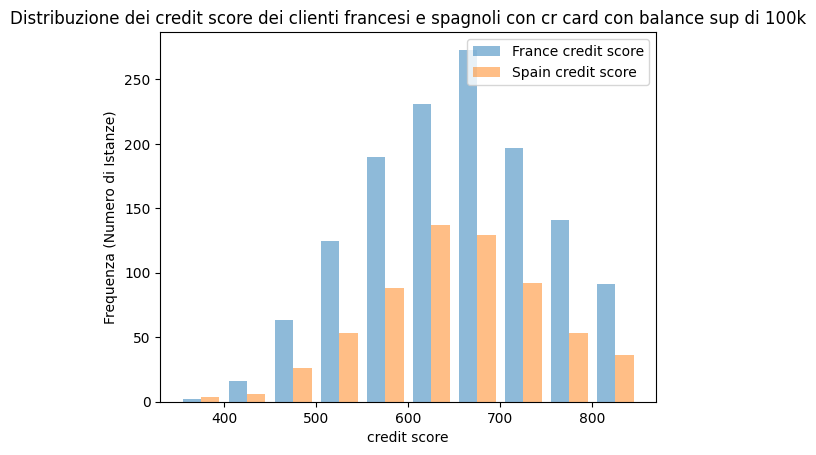

In [193]:
# Si passa una lista di array al metodo hist, che li plottà in overlay
plt.hist(
    [df_1[df_1['Geography']=='France']['CreditScore'],df_1[df_1['Geography']=='Spain']['CreditScore']],
    #bins=15, # Numero di barre per l'istogramma, di deafult impostato a 10

    label=['France credit score', 'Spain credit score'],

    alpha=0.5, #intenistà colore

)

plt.title('Distribuzione dei credit score dei clienti francesi e spagnoli con cr card con balance sup di 100k')
plt.xlabel('credit score')
plt.ylabel('Frequenza (Numero di Istanze)')
plt.legend(loc='upper right')
plt.show()

#osservando il graico possiamo osservare che tendenzialmente hanno credit score maggiore i clienti francesi

-------------------------------
PARTE 2
-------------------------------

In [194]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


Si vuole predire l’abbandono dei clienti della banca. Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le eventuali istanze che contengono valori nulli, trasformare opportunamente valori categorici e dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e 1/4 nel dataset “test” preservando le proporzioni delle classi nella colonna target.

In [195]:
df = pd.read_csv('churn.csv', sep =',')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [196]:
#gli attributi rown number, customerID non sono utili per la predizione, anzi possono indurre il modello ad overfittare. motivo per cui occorre rimuoverli
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [197]:
df.dropna(inplace=True) #elimino valori nulli, in questo caso non ce ne sono.

In [198]:
le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [199]:
X = df.drop('Exited', axis = 1)
y = df['Exited'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Allenare il train con il modello DecisionTree e valutare l’accuratezza ottenuta sia sul dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello KNeighborsClassifier. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori di accuracy, F1 score, l’analisi della confusion matrix e la predizione effettuata da un dummy classifier a scelta. (punti 4)

In [200]:
models = {'Dummy': DummyClassifier(strategy="most_frequent"),
          'DecisionTree': DecisionTreeClassifier(),
          'KN': KNeighborsClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #il dummy classifier ottiene un accuracy decente siccome il dataset è sblianciato e assegna sempre i sample alla classe con numero di istanze maggiori
  #si può però osservare che è un pessimo classificatore osservando l'f1 score (a 0) e la confusion matrix

  #per quanto riguarda il decision tree possiamo osservare un accuracy eccellente e un f1 score al massimo (entrambi ad 1) sul training set. ciò può essere indice di overfitting
  #anche considerando l'f1 score non ottimale sul test set

  #il kn ottiene dei buoni risultati in accuracy sia per quanto riguarda il training che il test. l'f1 score però non è ottimale e la confusion matrix ci fa capire che il modello non è ottimale

 ===== Dummy =====
accuracy on train 0.7962666666666667
accuracy on test 0.7964
F1 on train 0.0
F1 on test 0.0
confusion matrix on train 
 [[5972    0]
 [1528    0]]
confusion matrix on test 
 [[1991    0]
 [ 509    0]]
 ===== DecisionTree =====
accuracy on train 1.0
accuracy on test 0.7776
F1 on train 1.0
F1 on test 0.4774436090225564
confusion matrix on train 
 [[5972    0]
 [   0 1528]]
confusion matrix on test 
 [[1690  301]
 [ 255  254]]
 ===== KN =====
accuracy on train 0.8145333333333333
accuracy on test 0.7608
F1 on train 0.3157894736842105
F1 on test 0.11538461538461539
confusion matrix on train 
 [[5788  184]
 [1207  321]]
confusion matrix on test 
 [[1863  128]
 [ 470   39]]


Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con una 10 Fold cross validation. (punti 1)

In [201]:
# cross_val_score ritorna array di score su ciascun fold
acc_scores_dt = cross_val_score( DecisionTreeClassifier() ,X, y, cv=10, scoring='accuracy')
print("decision tree  accuracy 10-fold:", acc_scores_dt)
print("decision tree  mean accuracy 10-fold:", np.mean(acc_scores_dt))


acc_scores_kn = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy')
print("kn accuracy 10-fold:", acc_scores_kn)
print("kn accuracy mean 10-fold", np.mean(acc_scores_kn))

acc_score_dc = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='accuracy')
print("dummy classifier accuracy 10-fold:", acc_score_dc)
print("dummy classifier mean accuracy 10-fold", np.mean(acc_score_dc))

#possiamo osservare che i risultati ottenuti per tutti i modelli sono confrontabili con quelli osservati al punto precednete

decision tree  accuracy 10-fold: [0.785 0.786 0.806 0.78  0.793 0.78  0.801 0.815 0.778 0.801]
decision tree  mean accuracy 10-fold: 0.7925000000000001
kn accuracy 10-fold: [0.765 0.776 0.75  0.77  0.769 0.766 0.766 0.759 0.782 0.761]
kn accuracy mean 10-fold 0.7664000000000001
dummy classifier accuracy 10-fold: [0.796 0.796 0.796 0.796 0.796 0.796 0.796 0.797 0.797 0.797]
dummy classifier mean accuracy 10-fold 0.7962999999999999


Considerando i dati del test set e utilizzando il modello DecisionTree, la probabilità di predire l’abbandono del cliente della banca è la stessa per uomini e donne? (punti 2) Valutare se l’accuratezza della predizione negli uomini è la stessa ottenuta nelle donne. (punti 2) Come varia l’accuratezza se elimino l’attributo Gender? (punti 1)

In [202]:
#considero le predizioni fatte dal decision tree allenato prima
dt = models['DecisionTree']
y_test_pred = dt.predict(X_test)

# Creiamo un mask per le donne e gli uomini nel test set
women_mask = X_test['Gender'] == 0
men_mask   = X_test['Gender'] == 1

# Probabilità di predizione di Exited = 1
women_exited_rate = y_test_pred[women_mask].mean()
men_exited_rate   = y_test_pred[men_mask].mean()

print(f"Percentuale predetta di exited tra le donne: {women_exited_rate:.2f}")
print(f"Percentuale predetta di exited tra gli uomini: {men_exited_rate:.2f}")

# accuracy separata per genere
women_acc = accuracy_score(y_test[women_mask], y_test_pred[women_mask])
men_acc  = accuracy_score(y_test[men_mask], y_test_pred[men_mask])

print(f"acc per le donne: {women_acc:.2f}")
print(f"acc per gli uomini: {men_acc:.2f}")

#si può notare che per le donne è più proabbile che sia predetto che abbandonino la banca. in oltre l'accuracy del modello cala considerando solo le donne

Percentuale predetta di exited tra le donne: 0.26
Percentuale predetta di exited tra gli uomini: 0.19
acc per le donne: 0.75
acc per gli uomini: 0.80


In [203]:
#Rimuovere gender e riallenare
X_train_no_gender = X_train.drop('Gender', axis=1)
X_test_no_gender  = X_test.drop('Gender', axis=1)

dt_no_gender = DecisionTreeClassifier()
dt_no_gender.fit(X_train_no_gender, y_train)
y_test_pred_no_gender = dt_no_gender.predict(X_test_no_gender)

# Accuracy separata senza gender
women_acc_no_gender = accuracy_score(y_test[women_mask], y_test_pred_no_gender[women_mask])
men_acc_no_gender   = accuracy_score(y_test[men_mask], y_test_pred_no_gender[men_mask])

print(f"Accuracy donne senza gender: {women_acc_no_gender:.2f}")
print(f"Accuracy uomini senza gender: {men_acc_no_gender:.2f}")

#eliminando l'attributo gender si può notare che le accuracy si allineano

Accuracy donne senza gender: 0.75
Accuracy uomini senza gender: 0.79


A partire dal dataset iniziale (in cui sono stati eliminati eventuali attributi inutili ed eventuali istanze con valori nulli) aggiungere una nuova feature nel dataset con il valore di (EstimatedSalary*Tenure+Balance)/2. L’accuratezza del modello DecisionTree migliora? Come cambia l’accuratezza se i valori della nuova feature vengono discretizzati in 10 gruppi? (punti 2)


In [204]:
df["New_feature"] = ((df['EstimatedSalary'] * df['Tenure']) + df['Balance']) / 2
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,New_feature
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,101348.880
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,98175.220
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,535556.680
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,46913.315
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,141839.510
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,240676.600
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,537183.655
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,147299.530
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,176870.435


In [205]:
X = df.drop('Exited', axis = 1)
y = df['Exited'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [206]:
models = {'DecisionTree': DecisionTreeClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #l'accuracy del modello rimane costante rispetto al caso precednete

 ===== DecisionTree =====
accuracy on train 1.0
accuracy on test 0.7832


In [207]:

df['New_feature'] = pd.cut(df['New_feature'], bins=10,labels=False) #necessario lables = false per far si che i gruppi prodotti siano degli int e non degli intervalli (che sono categorici) che quindi non possono essere accettati

X = df.drop('Exited', axis = 1)
y = df['Exited'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

models = {'DecisionTree': DecisionTreeClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #l'accuracy del modello rimane costante rispetto al caso precednete

 ===== DecisionTree =====
accuracy on train 1.0
accuracy on test 0.7768


5. A partire dal dataset iniziale (in cui sono stati eliminati eventuali attributi inutili ed eventuali istanze con valori nulli) trovare i valori migliori dei parametri criterion e max_depth del classificatore DecisionTree. Come varia l’accuracy? (punti 2)


In [208]:
df = pd.read_csv('churn.csv', sep =',')
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)
df.dropna(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('Exited', axis = 1)
y = df['Exited'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [209]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[2,5,7,10,20]
}

#devi specificare refit quando si calcolano due metriche insieme.
gd_dt = GridSearchCV(DecisionTreeClassifier(),
                     parameters,
                     scoring='accuracy',
                     cv=5,
                     refit='accuracy')
gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 7, 10, 20]},
             refit='accuracy', scoring='accuracy')

In [210]:
best_par = gd_dt.best_params_
best_par

{'criterion': 'entropy', 'max_depth': 5}

In [211]:
best_score = gd_dt.best_score_
best_score

np.float64(0.8522666666666666)

In [212]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"accuracy on train {accuracy_score(y_train, y_train_pred_best)}")
print(f"accuracy on test {accuracy_score(y_test, y_test_pred_best)}")

#si può notare che l'utilizzo dei migliori parametri nel decision tree va a risolvere notevolmente il problema del overfitting
#il che porta ad ottenere un buon risultato sultest set

accuracy on train 0.8549333333333333
accuracy on test 0.8612


6. Creare una pipeline in cui gli attributi Balance e EstimatedSalary sono discretizzati in 6 intervalli, l’attributo Tenure è scalato nell’intervallo 0-1 e tutti gli altri attributi sono lasciati invariati. La pipeline deve applicare il modello DecisionTree con i parametri migliori trovati al punto 5. Valutare l’accuratezza della classificazione. (punti 3)

In [213]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 6), ["Balance","EstimatedSalary"]),
        ('minmax', MinMaxScaler(),["Tenure"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', DecisionTreeClassifier(criterion = 'log_loss', max_depth = 5))
                             ])

pipeline


Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=6),
                                                  ['Balance',
                                                   'EstimatedSalary']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Tenure'])])),
                ('estimator',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=5))])

In [214]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}")

#l'accuracy applicato la pipeline rimane confrontabile con quella osservata in precedenza nonnostante le trasformazioni applicate

accuracy on test 0.8596


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(



7. Creare una nuova pipeline che seleziona N componenti tra quelle ottenute dalla pipeline del punto 6 utilizzando la funzione TruncatedSVD e applica il modello DecisionTree. Attraverso la funzione di gridSearchCV, valutare il valore migliore per il numero di componenti (n_components) tra 2, 4 e 6 e il numero migliore di gruppi in cui discretizzare gli attributi Balance e EstimatedSalary. (punti 3)

In [215]:
#non chiede di aggiungere componenti, non si tratta di una feature uninion.

pipeline_best = Pipeline(steps=[
    ('preprocessing', col_tran),
    ("svd", TruncatedSVD()),
    ("estimator", DecisionTreeClassifier(criterion = 'log_loss', max_depth = 5))
])

pipeline_best

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=6),
                                                  ['Balance',
                                                   'EstimatedSalary']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Tenure'])])),
                ('svd', TruncatedSVD()),
                ('estimator',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=5))])

In [216]:

parameters = {
    'svd__n_components': [2, 4, 6],
    'preprocessing__discr__n_bins':[2,5,6,10]
}


gd = GridSearchCV(pipeline_best, parameters, scoring="accuracy", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)

print("Migliori parametri:", gd.best_params_)
best_pipeline = gd.best_estimator_

y_pred_gd_pl = best_pipeline.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_gd_pl)
print("accuracy del modello con i migliori parametri e svd:", acc_best)

#si può osservare che l'accuracy cala leggermente ma rimane confrontabile con i risultati precedenti

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

Migliori parametri: {'preprocessing__discr__n_bins': 6, 'svd__n_components': 6}
accuracy del modello con i migliori parametri e svd: 0.8288
